In [1]:
import yt
import math
from yt import YTArray

from yt.utilities.cosmology import Cosmology

co = Cosmology(hubble_constant=0.7, omega_matter=0.3,
               omega_lambda=0.7, omega_curvature=0.0)

import numpy as np
from yt.units import G
import matplotlib.pyplot as plt
import os
import array


import matplotlib
from scipy.interpolate import RectBivariateSpline
import pandas as pd
import matplotlib.colors as mcolors
import os
from scipy import stats
from matplotlib.colors import LogNorm
import matplotlib.colors as colors
from os.path import expanduser
home = expanduser("~")
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.gridspec
import time
import multiprocessing
from multiprocessing import Pool

/home/bego/anaconda3/lib/python3.8/site-packages/yt/utilities/logger.py:4: VisibleDeprecationWarning: The configuration file /home/bego/.config/yt/ytrc is deprecated in favor of /home/bego/.config/yt/yt.toml. Currently, both are present. Please manually remove the deprecated one to silence this warning.
Deprecated since v4.0.0. This feature will be removed in v4.1.0
  from yt.config import ytcfg


In [2]:
path_datos = "/home/bego/GARROTXA_copia/datos_GARROTXA_resim/"
path_csv = "/media/temp/bego/snapshots_resim/"
path_satelites = "/home/bego/GARROTXA/datos_GARROTXA_resim/"

plt.style.use('dark_background')
path_streams = "/media/temp1/bego/streams/satelites_crossmatch/"
path_results = "/home/bego/GARROTXA/acceleration/"

datos_edades =  pd.read_csv(path_datos + "edades.csv", sep = ",",index_col = 0)

In [65]:
ac_sat= pd.read_csv(path_results +"mesh_aceleracion_620_arania_satellites_id_ytRS.csv", sep = ",")

In [68]:
snapshots_analysis = [520, 
523,525, 527,530,532,535, 537,539,541,
543, 545,547, 550, 553, 555,557, 560, 563, 565, 567,570,573, 577, 580,
583, 585,587,590, 592,594,596,598,600,
602,604, 608, 610, 612, 614, 616, 618, 620, 622, 624, 626, 
629, 630, 632, 634, 636, 639, 640, 642, 644, 646, 648, 650, 652, 654, 656, 658, 660, 662, 
664, 666, 668,670, 672, 674, 676, 679, 681, 682, 684, 687, 689,
690, 692, 694, 698, 704, 706, 708,711, 712,714, 716, 718, 720, 
722, 724, 726, 728, 731, 732, 734, 736, 739, 740, 742, 744, 746, 748, 751,752,
755, 756, 758, 761,763, 764, 766, 768, 770, 772, 774, 776, 778,780, 
782, 784, 786, 788, 790, 792, 794, 797, 798,
802, 805, 806, 808, 810, 812, 814, 816,
 818, 820, 822, 824, 826, 828, 
830, 832, 834, 836, 839, 840, 842, 844, 846, 848, 850,
853, 855, 856, 858, 860, 862, 864, 867, 870, 872, 875, 877, 879, 881, 883, 884, 888,
890, 892, 894, 898, 900, 902, 904, 907, 908, 
910, 912, 915, 
916, 918, 921, 922, 924, 927, 929, 
930, 932, 934, 937, 939, 941,942, 944, 946, 948, 950, 952, 954,956, 
958, 961, 963, 965, 966, 968, 970, 972, 974, 976, 979,
 980, 982, 984, 989, 990, 993, 994, 996]

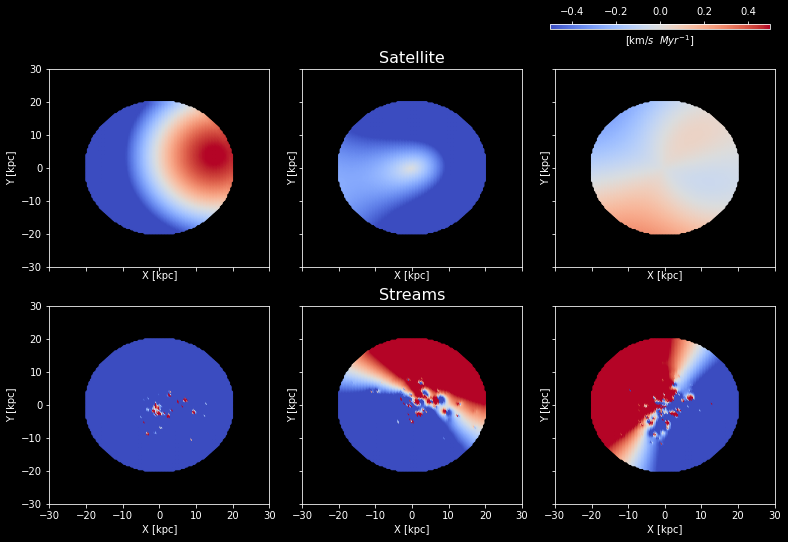

In [77]:
snapshots_analysis=[620]
for name in snapshots_analysis:
    ac_sat= pd.read_csv(path_results +f"mesh_aceleracion_{name}_arania_satellites_id_ytRS.csv", sep = ",")
    rango = 0.5
    ancho = 30
    fig, ax = plt.subplots(2, 3, sharex=True, sharey=True,figsize = (13,8))
    fig.subplots_adjust(hspace=0.2, wspace=0.15)

    az = ax[0,0].scatter(ac_sat.X, ac_sat.Y, marker='o', c=ac_sat.az_core*seconds_to_Myr, 
                cmap= "coolwarm", s = 10, vmin =-rango, vmax = rango)

    ax[0,0].set_xlabel("X [kpc]")
    ax[0,0].set_ylabel("Y [kpc]")
    ax[0,0].set_xlim(-ancho,ancho)
    ax[0,0].set_ylim(-ancho,ancho)
    #cbar_az_ax = fig.add_axes([0.36, 0.1, 0.01,0.85 ])
    #cbar_az = fig.colorbar(az,cbar_az_ax )



    ar = ax[0,1].scatter(ac_sat.X, ac_sat.Y, marker='o', 
                c=ac_sat.ar_core*seconds_to_Myr, cmap= "coolwarm", s = 10, vmin =-rango, vmax =rango)
    ax[0,1].set_xlabel("X [kpc]")
    ax[0,1].set_ylabel("Y [kpc]")
    ax[0,1].set_xlim(-ancho,ancho)
    ax[0,1].set_ylim(-ancho,ancho)
    #cbar_ar_ax = fig.add_axes([0.63, 0.1, 0.01,0.85 ])
    #cbar_ar = fig.colorbar(ar,cbar_ar_ax )
    ax[0,1].set_title("Satellite", fontsize = 16)
    aphi = ax[0,2].scatter(ac_sat.X, ac_sat.Y, marker='o',
                c=ac_sat.aphi_core*seconds_to_Myr, cmap= "coolwarm", s = 10,vmin =-rango, vmax = rango)
    ax[0,2].set_xlabel("X [kpc]")
    ax[0,2].set_ylabel("Y [kpc]")
    ax[0,2].set_xlim(-ancho,ancho)
    ax[0,2].set_ylim(-ancho,ancho)
    #cbar_aphi_ax = fig.add_axes([0.91,0.1, 0.01,0.85 ])
    #cbar_aphi = fig.colorbar(ar,cbar_aphi_ax )

    #------------- 
    az = ax[1,0].scatter(ac_sat.X, ac_sat.Y, marker='o', c=ac_sat.az_stream*seconds_to_Myr, 
                cmap= "coolwarm", s = 10, vmin =-rango, vmax = rango)

    ax[1,0].set_xlabel("X [kpc]")
    ax[1,0].set_ylabel("Y [kpc]")
    ax[1,0].set_xlim(-ancho,ancho)
    ax[1,0].set_ylim(-ancho,ancho)
    #cbar_az_ax = fig.add_axes([0.36, 0.1, 0.01,0.85 ])
    #cbar_az = fig.colorbar(az,cbar_az_ax )



    ar = ax[1,1].scatter(ac_sat.X, ac_sat.Y, marker='o', 
                c=ac_sat.ar_stream*seconds_to_Myr, cmap= "coolwarm", s = 10, vmin =-rango, vmax =rango)
    ax[1,1].set_xlabel("X [kpc]")
    ax[1,1].set_ylabel("Y [kpc]")
    ax[1,1].set_xlim(-ancho,ancho)
    ax[1,1].set_ylim(-ancho,ancho)
    #cbar_ar_ax = fig.add_axes([0.63, 0.1, 0.01,0.85 ])
    #cbar_ar = fig.colorbar(ar,cbar_ar_ax )
    ax[1,1].set_title("Streams", fontsize = 16)
    aphi = ax[1,2].scatter(ac_sat.X, ac_sat.Y, marker='o',
                c=ac_sat.aphi_stream*seconds_to_Myr, cmap= "coolwarm", s = 10,vmin =-rango, vmax = rango)
    ax[1,2].set_xlabel("X [kpc]")
    ax[1,2].set_ylabel("Y [kpc]")
    ax[1,2].set_xlim(-ancho,ancho)
    ax[1,2].set_ylim(-ancho,ancho)
    #cbar_aphi_ax = fig.add_axes([0.91,0.1, 0.01,0.85 ])
    #cbar_aphi = fig.colorbar(ar,cbar_aphi_ax )
    cbar_ax_ar = fig.add_axes([0.66, 0.95, 0.235, 0.008])
    cbar_ar  = fig.colorbar(az, cax=cbar_ax_ar , orientation = "horizontal", label=  "[km/$s$  $Myr^{-1}$]")    
    cbar_ar.ax.tick_params(labelsize= 10, top= True,bottom= False,
               labeltop=True,  labelbottom= False)
    plt.savefig (f"prueba_sats/arania_{name}.png")


In [37]:
snapshots_analysis = [520, 
523,525, 527,530,532,535, 537,539,541,
543, 545,547, 550, 553, 555,557, 560, 563, 565, 567,570,573, 577, 580,
583, 585,587,590, 592,594,596,598,600,
602,604, 608, 610, 612, 614, 616, 618, 620, 622, 624, 626, 
629, 630, 632, 634, 636, 639, 640, 642, 644, 646, 648, 650, 652, 654, 656, 658, 660, 662, 
664, 666, 668,670, 672, 674, 676, 679, 681, 682, 684, 687, 689,
690, 692, 694, 698, 704, 706, 708,711, 712,714, 716, 718, 720, 
722, 724, 726, 728, 731, 732, 734, 736, 739, 740, 742, 744, 746, 748, 751,752,
755, 756, 758, 761,763, 764, 766, 768, 770, 772, 774, 776, 778,780, 
782, 784, 786, 788, 790, 792, 794, 797, 798,
802, 805, 806, 808, 810, 812, 814, 816,
 818, 820, 822, 824, 826, 828, 
830, 832, 834, 836, 839, 840, 842, 844, 846, 848, 850,
853, 855, 856, 858, 860, 862, 864, 867, 870, 872, 875, 877, 879, 881, 883, 884, 888,
890, 892, 894, 898, 900, 902, 904, 907, 908, 
910, 912, 915, 
916, 918, 921, 922, 924, 927, 929, 
930, 932, 934, 937, 939, 941,942, 944, 946, 948, 950, 952, 954,956, 
958, 961, 963, 965, 966, 968, 970, 972, 974, 976, 979,
 980, 982, 984, 989, 990, 993, 994, 996]

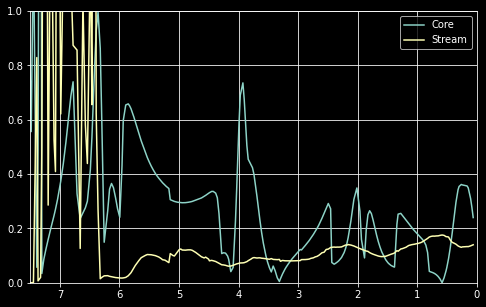

In [39]:
mean_core = np.zeros(len(snapshots_analysis))
mean_stream = np.zeros(len(snapshots_analysis))
lookback = np.zeros(len(snapshots_analysis))
for i, name in enumerate(snapshots_analysis):
    lookback[i] = datos_edades.loc[datos_edades['Snapshot'] == name, 'Lookback'].iloc[0]
    ac_sat= pd.read_csv(path_results + f"mesh_aceleracion_{name}_arania_satellites_id_ytRS.csv", sep = ",")
    ac_sat = ac_sat[(np.sqrt(ac_sat["X"]**2 +ac_sat["Y"]**2)<15)&(np.sqrt(ac_sat["X"]**2 +ac_sat["Y"]**2)>10)].copy()
    seconds_to_Myr = 3.15576e+16
    mean_core[i] = np.mean(np.abs(ac_sat.az_core))*seconds_to_Myr
   # print(mean_core)
    mean_stream[i] = np.mean(np.abs(ac_sat.az_stream))*seconds_to_Myr
  #  print(mean_stream)

fig = plt.figure(figsize=(8,5))

plt.plot(lookback, mean_core, label ="Core")
plt.plot(lookback, mean_stream, label ="Stream")
plt.xlim(7.5,0)
plt.ylim(0,1)
plt.legend()
plt.grid()
plt.show()

In [ ]:
p

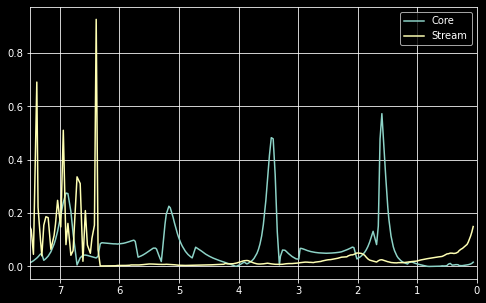

In [32]:
mean_core = np.zeros(len(snapshots_analysis))
mean_stream = np.zeros(len(snapshots_analysis))
lookback = np.zeros(len(snapshots_analysis))
for i, name in enumerate(snapshots_analysis):
    lookback[i] = datos_edades.loc[datos_edades['Snapshot'] == name, 'Lookback'].iloc[0]
    ac_sat= pd.read_csv(path_results + f"mesh_aceleracion_{name}_grillo_satellites_id_ytRS.csv", sep = ",")
    ac_sat = ac_sat[np.sqrt(ac_sat["X"]**2 +ac_sat["Y"]**2)<20].copy()
    seconds_to_Myr = 3.15576e+16
    mean_core[i] = np.mean(np.abs(ac_sat.az_core))*seconds_to_Myr
   # print(mean_core)
    mean_stream[i] = np.mean(np.abs(ac_sat.az_stream))*seconds_to_Myr
  #  print(mean_stream)

fig = plt.figure(figsize=(8,5))

plt.plot(lookback, mean_core, label ="Core")
plt.plot(lookback, mean_stream, label ="Stream")
plt.xlim(7.5,0)
plt.legend()
plt.grid()
plt.show()

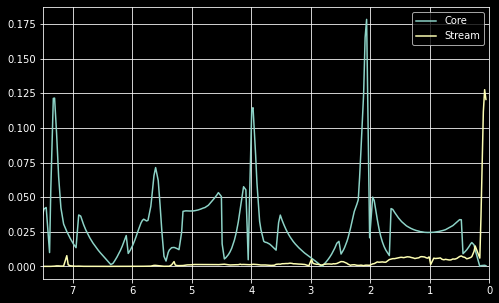

In [33]:
mean_core = np.zeros(len(snapshots_analysis))
mean_stream = np.zeros(len(snapshots_analysis))
lookback = np.zeros(len(snapshots_analysis))
for i, name in enumerate(snapshots_analysis):
    lookback[i] = datos_edades.loc[datos_edades['Snapshot'] == name, 'Lookback'].iloc[0]
    ac_sat= pd.read_csv(path_results + f"mesh_aceleracion_{name}_mosquito_satellites_id_ytRS.csv", sep = ",")
    ac_sat = ac_sat[np.sqrt(ac_sat["X"]**2 +ac_sat["Y"]**2)<20].copy()
    seconds_to_Myr = 3.15576e+16
    mean_core[i] = np.mean(np.abs(ac_sat.az_core))*seconds_to_Myr
   # print(mean_core)
    mean_stream[i] = np.mean(np.abs(ac_sat.az_stream))*seconds_to_Myr
  #  print(mean_stream)

fig = plt.figure(figsize=(8,5))

plt.plot(lookback, mean_core, label ="Core")
plt.plot(lookback, mean_stream, label ="Stream")
plt.xlim(7.5,0)
plt.legend()
plt.grid()
plt.show()